<a href="https://colab.research.google.com/github/SelgiAgilsa/uts-textminning/blob/main/uts_text_minning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

In [81]:
filename = "https://raw.githubusercontent.com/SelgiAgilsa/Tugas-ScrappingSerpAPI/main/review_hotel.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df

,hotel_name,name,rating,review
0,Mahima Hotel Semarang,The Jatmiko,4.0,Modern minimalis hotel for you thay want to st...
1,Mahima Hotel Semarang,Bilal Ukraina,5.0,Great 3 star hotel. Rooms are very clean and n...
2,Mahima Hotel Semarang,Yudhie Harianto,4.0,Hotel was nice and clean. But no fridge provid...
3,Mahima Hotel Semarang,Coach Iyu,3.0,"Air conditioner is not cold, you need to walk ..."
4,Mahima Hotel Semarang,Joshua Luther Thenadi,5.0,Designed nicely. Eventhough its not perfect in...
...,...,...,...,...
495,Hotel New Puri Garden Semarang,Widi Arto,4.0,Good
496,Hotel New Puri Garden Semarang,Schizo,5.0,Nice
497,Hotel New Puri Garden Semarang,rohmat setiawan,4.0,Good
498,Hotel New Puri Garden Semarang,Tansu Idaman,5.0,Good


In [82]:
df.drop(columns = ['hotel_name', 'name'], inplace = True)
df.columns = ['Rating', 'Review']
df.head()

,Rating,Review
0,4.0,Modern minimalis hotel for you thay want to st...
1,5.0,Great 3 star hotel. Rooms are very clean and n...
2,4.0,Hotel was nice and clean. But no fridge provid...
3,3.0,"Air conditioner is not cold, you need to walk ..."
4,5.0,Designed nicely. Eventhough its not perfect in...


Preprocessing Data

Cleaning The Text

In [83]:
import string
import re

In [84]:
def clean_Review(Review):
    return re.sub('[^a-zA-Z]', ' ', Review).lower()
  
df['cleaned_Review'] = df['Review'].apply(lambda x: clean_Review(str(x)))
df['label'] = df['Rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

Adding additional features - length of, and percentage of punctuations in the text

In [85]:
def count_punct(Review):
    count = sum([1 for char in Review if char in string.punctuation])
    return round(count/(len(Review) - Review.count(" ")), 3)*100
  
df['Review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_Review,label,Review_len,punct
0,4.0,Modern minimalis hotel for you thay want to st...,modern minimalis hotel for you thay want to st...,1,161,5.0
1,5.0,Great 3 star hotel. Rooms are very clean and n...,great star hotel rooms are very clean and n...,1,124,4.0
2,4.0,Hotel was nice and clean. But no fridge provid...,hotel was nice and clean but no fridge provid...,1,91,11.0
3,3.0,"Air conditioner is not cold, you need to walk ...",air conditioner is not cold you need to walk ...,0,159,3.8
4,5.0,Designed nicely. Eventhough its not perfect in...,designed nicely eventhough its not perfect in...,1,339,2.4
...,...,...,...,...,...,...
495,4.0,Good,good,1,4,0.0
496,5.0,Nice,nice,1,4,0.0
497,4.0,Good,good,1,4,0.0
498,5.0,Good,good,1,4,0.0


Tokenization

In [86]:
def tokenize_Review(Review):
    tokenized_Review = Review.split()
    return tokenized_Review
  
df['tokens'] = df['cleaned_Review'].apply(lambda x: tokenize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens
0,4.0,Modern minimalis hotel for you thay want to st...,modern minimalis hotel for you thay want to st...,1,161,5.0,"[modern, minimalis, hotel, for, you, thay, wan..."
1,5.0,Great 3 star hotel. Rooms are very clean and n...,great star hotel rooms are very clean and n...,1,124,4.0,"[great, star, hotel, rooms, are, very, clean, ..."
2,4.0,Hotel was nice and clean. But no fridge provid...,hotel was nice and clean but no fridge provid...,1,91,11.0,"[hotel, was, nice, and, clean, but, no, fridge..."
3,3.0,"Air conditioner is not cold, you need to walk ...",air conditioner is not cold you need to walk ...,0,159,3.8,"[air, conditioner, is, not, cold, you, need, t..."
4,5.0,Designed nicely. Eventhough its not perfect in...,designed nicely eventhough its not perfect in...,1,339,2.4,"[designed, nicely, eventhough, its, not, perfe..."


In [87]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [88]:
def lemmatize_Review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_Review'] = df['tokens'].apply(lambda x: lemmatize_Review(x))
df.head()

,Rating,Review,cleaned_Review,label,Review_len,punct,tokens,lemmatized_Review
0,4.0,Modern minimalis hotel for you thay want to st...,modern minimalis hotel for you thay want to st...,1,161,5.0,"[modern, minimalis, hotel, for, you, thay, wan...",modern minimalis hotel thay want stay bussines...
1,5.0,Great 3 star hotel. Rooms are very clean and n...,great star hotel rooms are very clean and n...,1,124,4.0,"[great, star, hotel, rooms, are, very, clean, ...",great star hotel room clean nice breakfast als...
2,4.0,Hotel was nice and clean. But no fridge provid...,hotel was nice and clean but no fridge provid...,1,91,11.0,"[hotel, was, nice, and, clean, but, no, fridge...",hotel nice clean fridge provided room room ser...
3,3.0,"Air conditioner is not cold, you need to walk ...",air conditioner is not cold you need to walk ...,0,159,3.8,"[air, conditioner, is, not, cold, you, need, t...",air conditioner not cold need walk outside smo...
4,5.0,Designed nicely. Eventhough its not perfect in...,designed nicely eventhough its not perfect in...,1,339,2.4,"[designed, nicely, eventhough, its, not, perfe...",designed nicely eventhough not perfect anyway ...


EDA

In [89]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"Rating 1.0 = { len(df[df['Rating']==1.0]) } rows")
print(f"Rating 2.0 = { len(df[df['Rating']==2.0]) } rows")
print(f"Rating 3.0 = { len(df[df['Rating']==3.0]) } rows")
print(f"Rating 4.0 = { len(df[df['Rating']==4.0]) } rows")
print(f"Rating 5.0 = { len(df[df['Rating']==5.0]) } rows")

Input data has 500 rows and 8 columns
Rating 1.0 = 26 rows
Rating 2.0 = 23 rows
Rating 3.0 = 69 rows
Rating 4.0 = 141 rows
Rating 5.0 = 241 rows


Number of null in label: 0
Number of null in text: 0


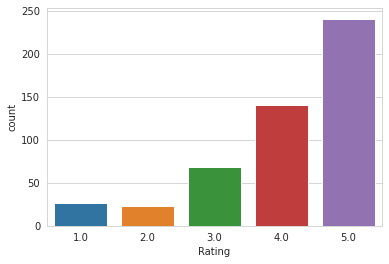

In [90]:
# Missing values in the dataset
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);

Visualizing Word Clouds

In [91]:
from wordcloud import WordCloud

In [92]:
df_negative = df[ (df['Rating']==1.0) | (df['Rating']==2.0) | (df['Rating']==3.0) ]
df_positive = df[ (df['Rating']==4.0) | (df['Rating']==5.0) ]

#convert to list
negative_list=df_negative['lemmatized_Review'].tolist()
positive_list=df_positive['lemmatized_Review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()


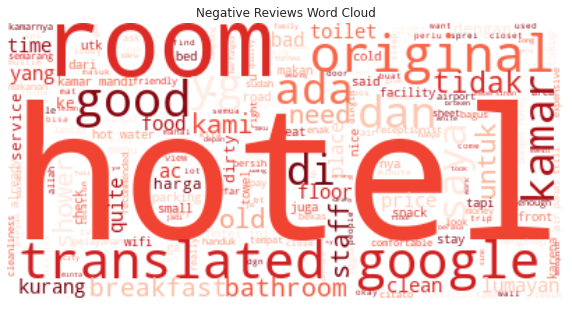

In [93]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

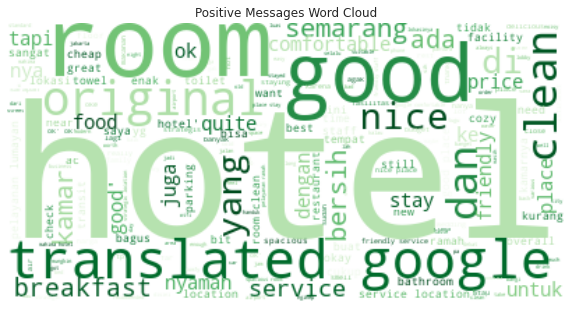

In [94]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Messages Word Cloud")
plt.show()

Feature Extraction from Text

In [95]:
X = df[['lemmatized_Review', 'Review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(500, 3)
(500,)


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350, 3)
(150, 3)
(350,)
(150,)


In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_Review'])
tfidf_test = tfidf.transform(X_test['lemmatized_Review'])

X_train_vect = pd.concat([X_train[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913
0,30,10.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

Training different Classification models

In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Menggunakan Algoritma Multinomia Naive Bayes

              precision    recall  f1-score   support

           0       0.52      0.30      0.38        37
           1       0.80      0.91      0.85       113

    accuracy                           0.76       150
   macro avg       0.66      0.60      0.62       150
weighted avg       0.73      0.76      0.73       150



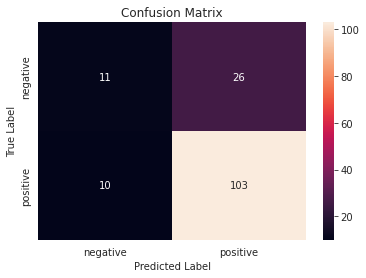

In [99]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Random Forest Classiefier

              precision    recall  f1-score   support

           0       0.45      0.14      0.21        37
           1       0.77      0.95      0.85       113

    accuracy                           0.75       150
   macro avg       0.61      0.54      0.53       150
weighted avg       0.69      0.75      0.69       150



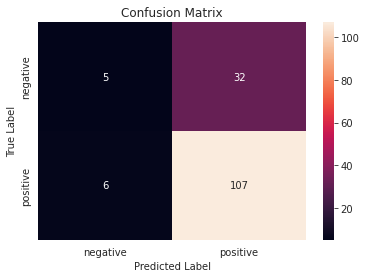

In [100]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.11      0.19        37
           1       0.77      0.99      0.87       113

    accuracy                           0.77       150
   macro avg       0.79      0.55      0.53       150
weighted avg       0.78      0.77      0.70       150



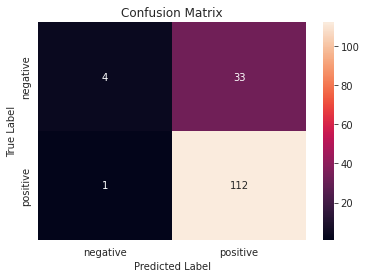

In [101]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma Support Vector Machine

              precision    recall  f1-score   support

           0       0.69      0.30      0.42        37
           1       0.81      0.96      0.87       113

    accuracy                           0.79       150
   macro avg       0.75      0.63      0.64       150
weighted avg       0.78      0.79      0.76       150



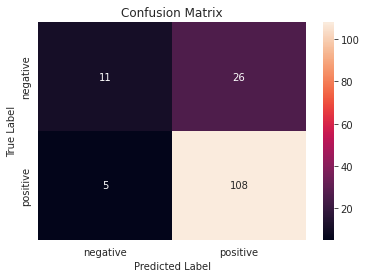

In [102]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan Algoritma KNN (K NEAREST NEIGHBOUR)

              precision    recall  f1-score   support

           0       0.07      0.03      0.04        37
           1       0.73      0.88      0.80       113

    accuracy                           0.67       150
   macro avg       0.40      0.45      0.42       150
weighted avg       0.57      0.67      0.61       150



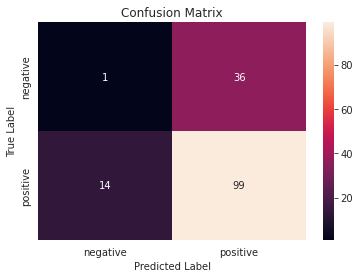

In [103]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Menggunakan algoritma Extra Tress Classifier

              precision    recall  f1-score   support

           0       0.47      0.22      0.30        37
           1       0.78      0.92      0.85       113

    accuracy                           0.75       150
   macro avg       0.63      0.57      0.57       150
weighted avg       0.71      0.75      0.71       150



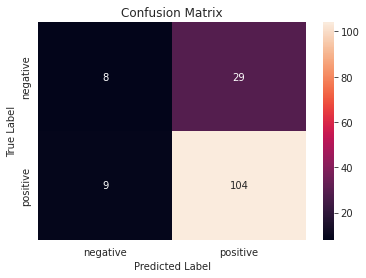

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)
classifier.fit(X_train_vect, y_train)
extra_trees_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, extra_trees_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, extra_trees_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

K=10

In [105]:
from sklearn.model_selection import cross_val_score

models = [
          MultinomialNB(),
          LogisticRegression(),
          RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'),
          KNeighborsClassifier(n_neighbors = 5),
          ExtraTreesClassifier(n_estimators=150, random_state=50)
         ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.7514285714285716 
 precision - 0.7999752321575591 
 recall - 0.9027065527065525 
 f1 - 0.8464200856075242 

Logistic Regression
 accuracy - 0.7828571428571429 
 precision - 0.7873949579831933 
 recall - 0.9850427350427351 
 f1 - 0.8747434433226987 

Random Forest
 accuracy - 0.7657142857142858 
 precision - 0.7943960333063013 
 recall - 0.9366096866096866 
 f1 - 0.8617668806061201 

SVM
 accuracy - 0.82 
 precision - 0.8299837867698399 
 recall - 0.9666666666666666 
 f1 - 0.8922159577428111 

KNN
 accuracy - 0.7285714285714286 
 precision - 0.779519117562082 
 recall - 0.9032763532763532 
 f1 - 0.8361436152718269 

Extra Trees
 accuracy - 0.7742857142857142 
 precision - 0.8128337149502333 
 recall - 0.917948717948718 
 f1 - 0.8609924672811873 



prediction

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_Review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [116]:
#Algoritma Random Forest Classiefier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.86

In [117]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict(vect)
print(my_prediction)

[0 1 0 1]
